In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots 
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
adu = pd.read_csv("ADULT_asd/csv_result-Autism-Adult-Data.csv",na_values=['?'])

In [5]:
adu.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO


In [7]:
# Number of tuples and fields
print("Adults      :",adu.shape)
adu.info()

Adults      : (704, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               704 non-null    int64  
 1   A1_Score         704 non-null    int64  
 2   A2_Score         704 non-null    int64  
 3   A3_Score         704 non-null    int64  
 4   A4_Score         704 non-null    int64  
 5   A5_Score         704 non-null    int64  
 6   A6_Score         704 non-null    int64  
 7   A7_Score         704 non-null    int64  
 8   A8_Score         704 non-null    int64  
 9   A9_Score         704 non-null    int64  
 10  A10_Score        704 non-null    int64  
 11  age              702 non-null    float64
 12  gender           704 non-null    object 
 13  ethnicity        609 non-null    object 
 14  jundice          704 non-null    object 
 15  austim           704 non-null    object 
 16  contry_of_res    704 non-null    objec

In [8]:
#Adults
adu.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [9]:
#Total number of missing values in each dataset
print("Total no. of missing values in Adults's dataset     : ",adu.isnull().sum().sum())

Total no. of missing values in Adults's dataset     :  192


In [10]:
#Adults
adu.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

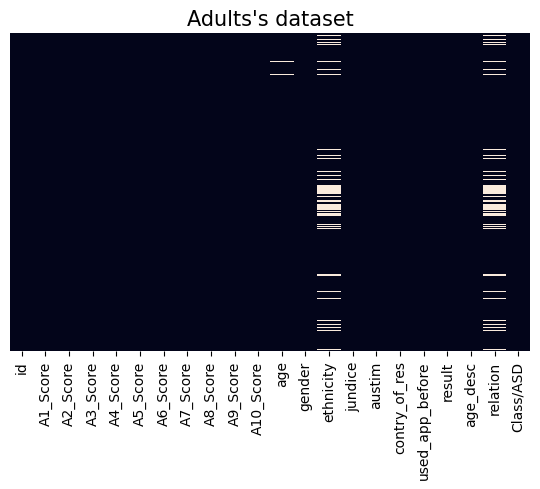

In [11]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(adu.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap_adu.pdf', transparent=True, dpi=300)

In [12]:
#ASD or Not
print("\nNo of adults diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'YES']))
print("No of adults not diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'NO']))


No of adults diagonised with ASD =  189
No of adults not diagonised with ASD =  515


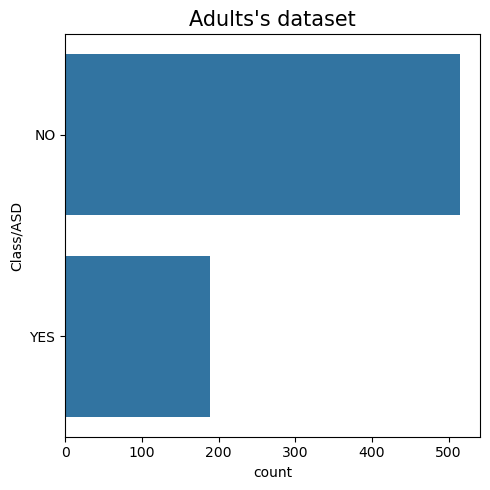

In [17]:
# #Data distribution
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(adu['Class/ASD'],ax=ax)
ax.set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('distribution_adu.pdf', transparent=True, dpi=300)

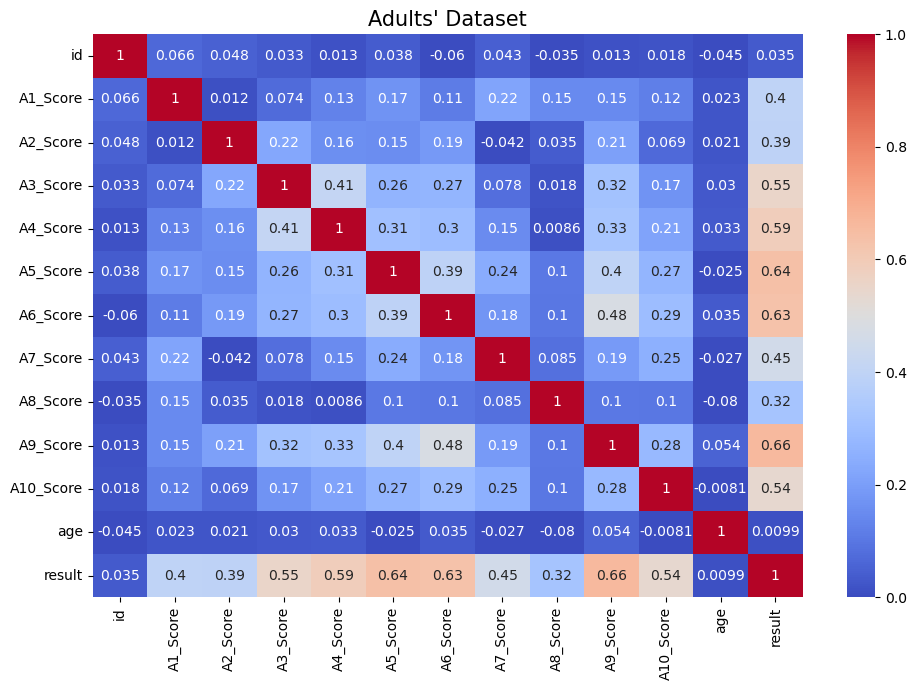

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
adu_numeric = adu.select_dtypes(include=['number'])
sns.heatmap(adu_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax)
ax.set_title("Adults' Dataset", fontsize=15)
fig.tight_layout()
plt.savefig('correlation_adu.pdf', transparent=True, dpi=300)


In [19]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

adu.ethnicity = imputer_mode.fit_transform(adu.ethnicity.values.reshape(-1,1))[:,0]
adu.relation = imputer_mode.fit_transform(adu.relation.values.reshape(-1,1))[:,0]

#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='mean')
adu.age = imputer_mode.fit_transform(adu.age.values.reshape(-1,1))[:,0]

In [20]:
print("After imputing,\nNo of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

After imputing,
No of missing values in Adults's dataset      =  0


In [21]:
#Since age of toddlers are represented in months, age(in years) of adults is converted to age in months.
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

adu['Age_Mons'] = adu['Age_Mons']*12

In [22]:
#Making classes of categorical variables same for all datasets
adu['ethnicity'] = adu['ethnicity'].replace('Others','others')

In [28]:
adu.sample(5)


,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
160,161,0,0,0,0,0,0,0,0,0,...,m,Asian,no,no,India,no,0,18 and more,Parent,NO
542,543,0,1,1,1,1,1,1,1,1,...,f,Asian,no,no,Malaysia,no,9,18 and more,Self,YES
548,549,1,1,1,1,0,0,1,0,0,...,m,White-European,no,no,United Kingdom,no,6,18 and more,Self,NO
520,521,1,1,1,1,1,0,0,1,1,...,f,White-European,no,yes,Italy,no,8,18 and more,Self,YES
163,164,1,1,0,0,0,0,0,1,0,...,m,Asian,no,no,Sri Lanka,no,3,18 and more,Self,NO


In [30]:
adu.to_csv('preprocessed_adult.csv', index=False)